# Desafio 3

Neste desafio, iremos praticar nossos conhecimentos sobre distribuições de probabilidade. Para isso,
dividiremos este desafio em duas partes:
    
1. A primeira parte contará com 3 questões sobre um *data set* artificial com dados de uma amostra normal e
    uma binomial.
2. A segunda parte será sobre a análise da distribuição de uma variável do _data set_ [Pulsar Star](https://archive.ics.uci.edu/ml/datasets/HTRU2), contendo 2 questões.

> Obs.: Por favor, não modifique o nome das funções de resposta.

A `função de distibuição de probabilidade` é uma função que descreve a probabilidade de obter os possíveis valores que uma variável randomica pode assumir.

## _Setup_ geral

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF

In [2]:
# %matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

## Parte 1

### _Setup_ da parte 1

In [3]:
np.random.seed(42)
    
dataframe = pd.DataFrame({"normal": sct.norm.rvs(20, 4, size=10000),
                     "binomial": sct.binom.rvs(100, 0.2, size=10000)})

## Inicie sua análise a partir da parte 1 a partir daqui

Analisando as primeiras 5 linhas do conjunto de dados criado.

In [4]:
# exibindo as primeiras 5 linhas
dataframe.head()

,normal,binomial
0,21.986857,18
1,19.446943,15
2,22.590754,14
3,26.092119,15
4,19.063387,21


In [5]:
# analisando o resumo estatístico
dataframe.describe()

,normal,binomial
count,10000.000000,10000.000000
mean,19.991456,20.097000
std,4.013850,4.041191
min,4.310399,6.000000
25%,17.309638,17.000000
50%,19.989620,20.000000
75%,22.684324,23.000000
max,35.704951,36.000000


Olhando os gráficos da distribuição cada.

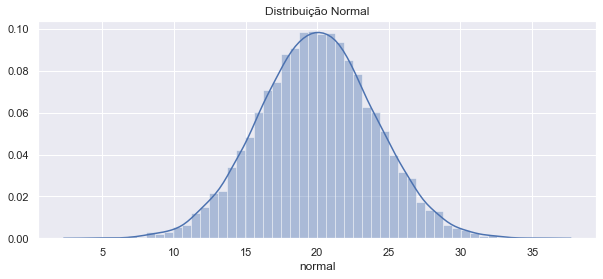

In [6]:
# definindo tamanho da área de plotagem
plt.figure(figsize(10,4))

# gráfico da distribuição normal
sns.distplot(dataframe.normal)

# inserindo título no gráfico
plt.title('Distribuição Normal');

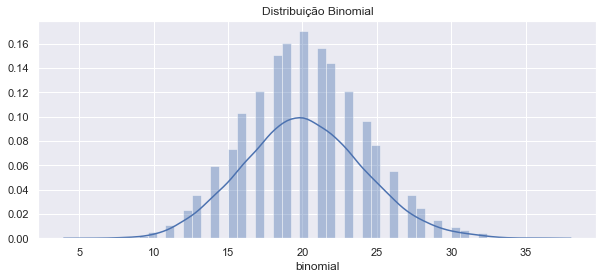

In [7]:
# definindo tamanho da área de plotagem
plt.figure(figsize(10,4))

# gráfico da distribuição normal
sns.distplot(dataframe.binomial)

# inserindo título no gráfico
plt.title('Distribuição Binomial');

## Questão 1

Qual a diferença entre os quartis (Q1, Q2 e Q3) das variáveis `normal` e `binomial` de `dataframe`? Responda como uma tupla de três elementos arredondados para três casas decimais.

Em outra palavras, sejam `q1_norm`, `q2_norm` e `q3_norm` os quantis da variável `normal` e `q1_binom`, `q2_binom` e `q3_binom` os quantis da variável `binom`, qual a diferença `(q1_norm - q1 binom, q2_norm - q2_binom, q3_norm - q3_binom)`?

`Quantis` são pontos estabelecidos em intervalos regulares a partir da *função de distibuição acumulada (FDA)* de uma variável aleatória.

In [8]:
def q1():
    # definindo a lista dos quartis
    q_list = [0.25, 0.50, 0.75]

    # definindo os objetos
    df_norm = dataframe.normal
    df_bino = dataframe.binomial

    # subtraindo os valores com 3 casas decimais
    sub = df_norm.quantile(q_list) - df_bino.quantile(q_list)

    # retornando o resultado e convertendo em tuple com 3 casas decimais
    return tuple(round(sub, 3))

q1()

(0.31, -0.01, -0.316)

Para refletir:

* Você esperava valores dessa magnitude?<br>
*Já havia analisado pelo describe e pode-se notar que a diferença não é significativa, sendo o variável contínua com valores nas cadas dos decimais e a discreta são valores inteiros.*


* Você é capaz de explicar como distribuições aparentemente tão diferentes (discreta e contínua, por exemplo) conseguem dar esses valores?<br>
*O dataframe foi construido de forma a ficarem na mesma proporção com valores aleatórios, embora tipos diferentes, os valores são praticamente iguais.*

## Questão 2

Considere o intervalo $[\bar{x} - s, \bar{x} + s]$, onde $\bar{x}$ é a média amostral e $s$ é o desvio padrão. Qual a probabilidade nesse intervalo, calculada pela função de distribuição acumulada empírica (CDF empírica) da variável `normal`? Responda como uma único escalar arredondado para três casas decimais.

In [9]:
def q2(i=1):
    # definindo os objetos
    d1 = dataframe.normal.mean() - (i * dataframe.normal.std())
    d2 = dataframe.normal.mean() + (i * dataframe.normal.std())
    
    # definindo função da distribuição acumulada empirica (CDF empírica) 
    cdf = ECDF(dataframe.normal)
    
    # calculando a probabilidade do intervalo
    prob_interval = cdf(d2) - cdf(d1)
    
    # retornando o resultado
    return round(prob_interval, 3)

q2()

0.684

A probabilidade de ser nesse intervalo é de **68.4%**, ver intervalo abaixo.

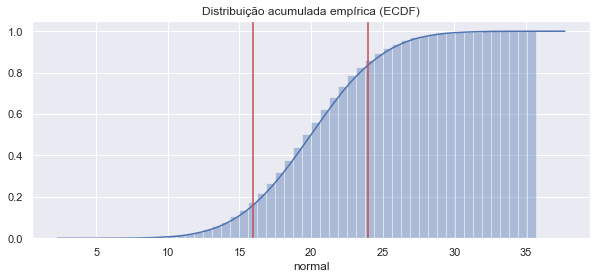

In [10]:
# definindo objetos para intervalos
d1 = dataframe.normal.mean() - dataframe.normal.std()
d2 = dataframe.normal.mean() + dataframe.normal.std()

# definindo tamanho da área de plotagem
plt.figure(figsize(10,4))

# gráfico da distribuição normal
sns.distplot(dataframe.normal, hist_kws={'cumulative':True}, kde_kws={'cumulative':True})

# definindo o limite inferior do intervalo
plt.axvline(x=d1, ymin=0, ymax=1, color='r')

# definindo o limite superior do intervalo
plt.axvline(x=d2, ymin=0, ymax=1, color='r')

plt.title('Distribuição acumulada empírica (ECDF)');

Para refletir:

* Esse valor se aproxima do esperado teórico?
* Experimente também para os intervalos $[\bar{x} - 2s, \bar{x} + 2s]$ e $[\bar{x} - 3s, \bar{x} + 3s]$.

**Probabilidade para o intervalo de $[\bar{x} - 2s, \bar{x} + 2s]$**

In [11]:
# calculando a probabilidade para (2 * desvios-padrão)
q2(2)

0.954

A probabilidade para 2 desvios-padrão é de **95,4%**, ver intervalo abaixo.

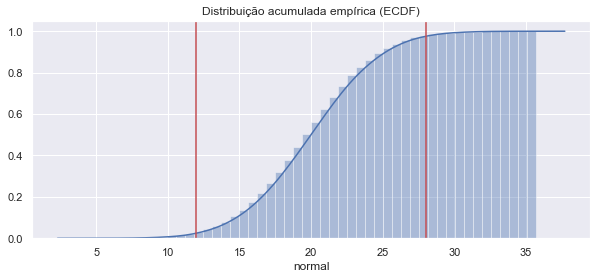

In [12]:
# definindo objetos para intervalos
d1_2 = dataframe.normal.mean() - (2 * dataframe.normal.std())
d2_2 = dataframe.normal.mean() + (2 * dataframe.normal.std())

# definindo tamanho da área de plotagem
plt.figure(figsize(10,4))

# gráfico da distribuição normal
sns.distplot(dataframe.normal, hist_kws={'cumulative':True}, kde_kws={'cumulative':True})

# definindo o limite inferior do intervalo
plt.axvline(x=d1_2, ymin=0, ymax=1, color='r')

# definindo o limite superior do intervalo
plt.axvline(x=d2_2, ymin=0, ymax=1, color='r')

plt.title('Distribuição acumulada empírica (ECDF)');

**Probabilidade para o intervalo de $[\bar{x} - 3s, \bar{x} + 3s]$**

In [13]:
# calculando a probabilidade para (2 * desvios-padrão)
q2(3)

0.997

A probabilidade para 2 desvios-padrão é de **99,7%**, ver intervalo abaixo.

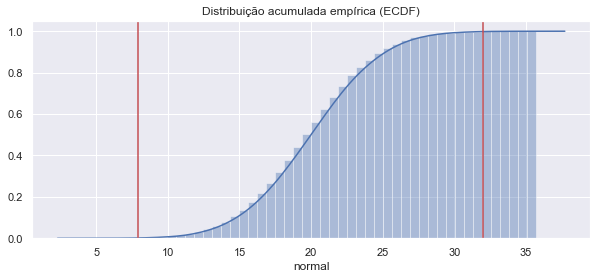

In [14]:
# definindo objetos para intervalos
d1_3 = dataframe.normal.mean() - (3 * dataframe.normal.std())
d2_3 = dataframe.normal.mean() + (3 * dataframe.normal.std())

# definindo tamanho da área de plotagem
plt.figure(figsize(10,4))

# gráfico da distribuição normal
sns.distplot(dataframe.normal, hist_kws={'cumulative':True}, kde_kws={'cumulative':True})

# definindo o limite inferior do intervalo
plt.axvline(x=d1_3, ymin=0, ymax=1, color='r')

# definindo o limite superior do intervalo
plt.axvline(x=d2_3, ymin=0, ymax=1, color='r')

plt.title('Distribuição acumulada empírica (ECDF)');

## Questão 3

Qual é a diferença entre as médias e as variâncias das variáveis `binomial` e `normal`? Responda como uma tupla de dois elementos arredondados para três casas decimais.

Em outras palavras, sejam `m_binom` e `v_binom` a média e a variância da variável `binomial`, e `m_norm` e `v_norm` a média e a variância da variável `normal`. Quais as diferenças `(m_binom - m_norm, v_binom - v_norm)`?

In [15]:
def q3():
    # subtraindo as médias    
    sub_medias = dataframe.binomial.mean() - dataframe.normal.mean()
    
    # subtraindo as variâncias
    sub_var = np.var(dataframe.binomial) - np.var(dataframe.normal)
    
    # retornando o resultado
    return tuple([round(x, 3) for x in (sub_medias, sub_var)])

q3()

(0.106, 0.22)

Para refletir:

* Você esperava valore dessa magnitude?
* Qual o efeito de aumentar ou diminuir $n$ (atualmente 100) na distribuição da variável `binomial`?

## Parte 2

### _Setup_ da parte 2

In [16]:
stars = pd.read_csv("pulsar_stars.csv")

stars.rename({old_name: new_name
              for (old_name, new_name)
              in zip(stars.columns,
                     ["mean_profile", "sd_profile", "kurt_profile", "skew_profile", "mean_curve", "sd_curve", "kurt_curve", "skew_curve", "target"])
             },
             axis=1, inplace=True)

stars.loc[:, "target"] = stars.target.astype(bool)

## Inicie sua análise da parte 2 a partir daqui

In [17]:
# verificando as 5 primeiras linhas
stars.head()

,mean_profile,sd_profile,kurt_profile,skew_profile,mean_curve,sd_curve,kurt_curve,skew_curve,target
0,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,False
1,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,False
2,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,False
3,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,False
4,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,False


In [18]:
# verificando o resumo estatístico das variáveis numéricas
stars.describe()

,mean_profile,sd_profile,kurt_profile,skew_profile,mean_curve,sd_curve,kurt_curve,skew_curve
count,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000
mean,111.078321,46.549021,0.477897,1.770417,12.614926,26.326918,8.303574,104.859419
std,25.652705,6.843040,1.064056,6.168058,29.473637,19.471042,4.506217,106.517270
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976
25%,100.929688,42.375426,0.027108,-0.188528,1.923077,14.437330,5.781485,34.957119
50%,115.078125,46.946435,0.223241,0.198736,2.801839,18.459977,8.433872,83.068996
75%,127.085938,51.022887,0.473349,0.928206,5.464883,28.428152,10.702973,139.310905
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837


In [19]:
# verificando o resumo estatístico da variável target (boolean)
stars.target.describe()

count     17897
unique        2
top       False
freq      16258
Name: target, dtype: object

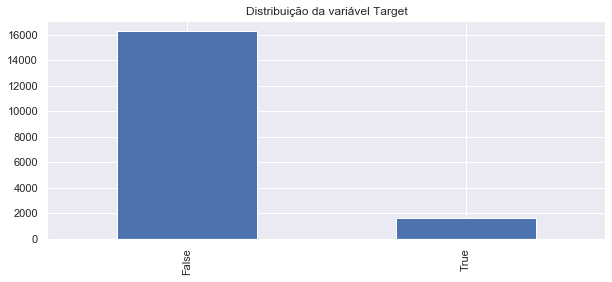

In [20]:
# verificando a distribuição da variável target
stars.target.value_counts().plot('bar')

# adicionando título
plt.title('Distribuição da variável Target');

Nota-se que é bem desbalanceado.

## Questão 4

Considerando a variável `mean_profile` de `stars`:

1. Filtre apenas os valores de `mean_profile` onde `target == 0` (ou seja, onde a estrela não é um pulsar).
2. Padronize a variável `mean_profile` filtrada anteriormente para ter média 0 e variância 1.

Chamaremos a variável resultante de `false_pulsar_mean_profile_standardized`.

Encontre os quantis teóricos para uma distribuição normal de média 0 e variância 1 para 0.80, 0.90 e 0.95 através da função `norm.ppf()` disponível em `scipy.stats`.

Quais as probabilidade associadas a esses quantis utilizando a CDF empírica da variável `false_pulsar_mean_profile_standardized`? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [21]:
# filtrando a variável target
starsNew = stars[stars.target==0]

# padronizando a variável
false_pulsar_mean_profile_standardized = (starsNew.mean_profile - starsNew.mean_profile.mean()) / starsNew.mean_profile.std()

**Padronização das variáveis** são mais fáceis para compará-los entre si, quando são medidos em escalas diferentes.

In [22]:
def q4():
    # definindo os objetos para os quantis
    q80 = sct.norm.ppf(0.80, loc=0, scale=1)
    q90 = sct.norm.ppf(0.90, loc=0, scale=1)
    q95 = sct.norm.ppf(0.95, loc=0, scale=1)
    
    # calculando a probabilidade
    prob_cdf = ECDF(false_pulsar_mean_profile_standardized)
    
    # armazenando o resultado
    result = prob_cdf(q80), prob_cdf(q90), prob_cdf(q95)
    
    # retornando o resultado em uma tupla
    return tuple([round(x,3) for x in result])

q4()

(0.806, 0.911, 0.959)

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?

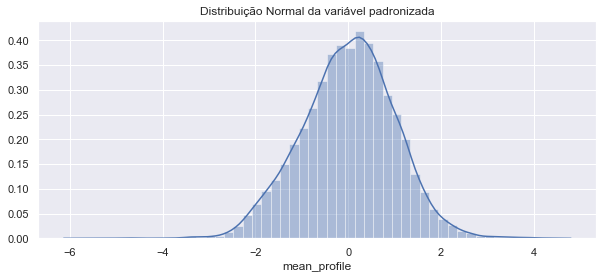

In [23]:
# definindo tamanho da área de plotagem
plt.figure(figsize(10,4))

# gráfico da distribuição normal
sns.distplot(false_pulsar_mean_profile_standardized)

# inserindo título no gráfico
plt.title('Distribuição Normal da variável padronizada');

## Questão 5

Qual a diferença entre os quantis Q1, Q2 e Q3 de `false_pulsar_mean_profile_standardized` e os mesmos quantis teóricos de uma distribuição normal de média 0 e variância 1? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [24]:
def q5():
    # definindo o objeto para os quantisl padronizada
    q = false_pulsar_mean_profile_standardized.quantile([0.25, 0.50, 0.75])
    q_ppf = sct.norm.ppf([0.25, 0.50, 0.75])
    
    # realizando a subtração
    diff = round(q - q_ppf, 3)
    
    # retornando o resultado
    return tuple(diff)

q5()

(0.027, 0.04, -0.004)

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?
* Curiosidade: alguns testes de hipóteses sobre normalidade dos dados utilizam essa mesma abordagem.